## Proyecto Ciencia de Datos en Python Fabián Hernández 1803299

Importo paquetes necesarios para el proyecto

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# Cargo datos usando la funcion load de numpy 
data = np.load('proyecto_training_data.npy')
mascara = np.random.rand(len(data)) <= 0.8
data_training = data[mascara]
data_test = data[~mascara]

Obtengo datos de cada columna del dataset

In [25]:
sale_price = data_training[:,0]
OverallQual = data_training[:,1]
stFLsf = data_training[:,2]
TotalRmsAbvGrd = data_training[:,3]
YearBuilt = data_training[:,4]
LotFrontage = data_training[:,5]
newLotFrontage = LotFrontage[~np.isnan(LotFrontage)]

3. Obtengo media, maximo, minimo, rango y desviacion estandar de cada dato 

In [26]:
list_mean = [np.mean(sale_price),np.mean(OverallQual),np.mean(stFLsf),np.mean(TotalRmsAbvGrd),np.mean(YearBuilt),np.nanmean(newLotFrontage)]
list_max = [np.max(sale_price),np.max(OverallQual),np.max(stFLsf),np.max(TotalRmsAbvGrd),np.max(YearBuilt),np.nanmax(newLotFrontage)]
list_min = [np.min(sale_price),np.min(OverallQual),np.min(stFLsf),np.min(TotalRmsAbvGrd),np.min(YearBuilt),np.nanmin(newLotFrontage)]
list_range = [np.ptp(sale_price),np.ptp(OverallQual),np.ptp(stFLsf),np.ptp(TotalRmsAbvGrd),np.ptp(YearBuilt),np.ptp(newLotFrontage)]
list_std = [np.std(sale_price),np.std(OverallQual),np.std(stFLsf),np.std(TotalRmsAbvGrd),np.std(YearBuilt),np.nanstd(newLotFrontage)]
list_campos = ["Property's sale price in dollars","Overall material and finish quality","First Floor square feet","Total rooms above grade","Original construction date","Linear feet of street connected to property"]
for x in range(0,6):
    print(f"Para el campo {list_campos[x]} la media es de: {list_mean[x]}, el valor maximo es de {list_max[x]}, el valor minimo es de {list_min[x]}, el rango es de {list_range[x]}, la desviacion estandar es de: {list_std[x]}\n")


 

Para el campo Property's sale price in dollars la media es de: 181312.91582491584, el valor maximo es de 755000.0, el valor minimo es de 34900.0, el rango es de 720100.0, la desviacion estandar es de: 79664.17056046709

Para el campo Overall material and finish quality la media es de: 6.125420875420875, el valor maximo es de 10.0, el valor minimo es de 1.0, el rango es de 9.0, la desviacion estandar es de: 1.3836199926798332

Para el campo First Floor square feet la media es de: 1166.9402356902358, el valor maximo es de 4692.0, el valor minimo es de 334.0, el rango es de 4358.0, la desviacion estandar es de: 391.1065162258076

Para el campo Total rooms above grade la media es de: 6.523569023569023, el valor maximo es de 12.0, el valor minimo es de 2.0, el rango es de 10.0, la desviacion estandar es de: 1.5981734279613735

Para el campo Original construction date la media es de: 1971.1599326599326, el valor maximo es de 2010.0, el valor minimo es de 1872.0, el rango es de 138.0, la desv

4. Para cada variable en el dataset usar seaborn(función distplot para graficar un histograma de la variable)

[Text(0.5, 1.0, "Property's sale price in dollars")]

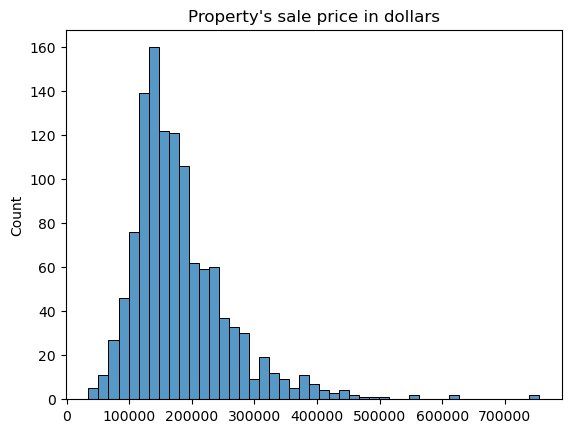

In [27]:
sns.histplot(data=sale_price).set(title="Property's sale price in dollars")


[Text(0.5, 1.0, 'Overall material and finish quality')]

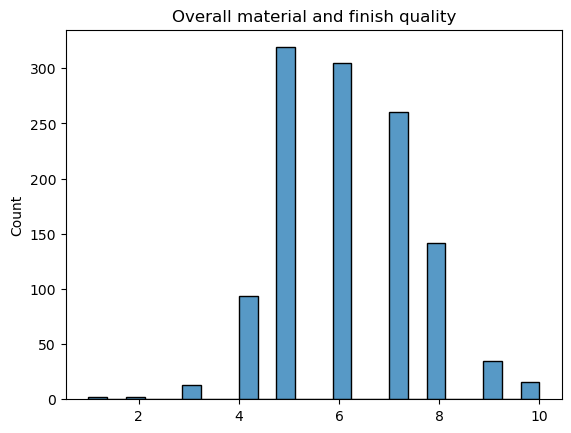

In [28]:
sns.histplot(data=OverallQual).set(title='Overall material and finish quality')

[Text(0.5, 1.0, 'First Floor square feet')]

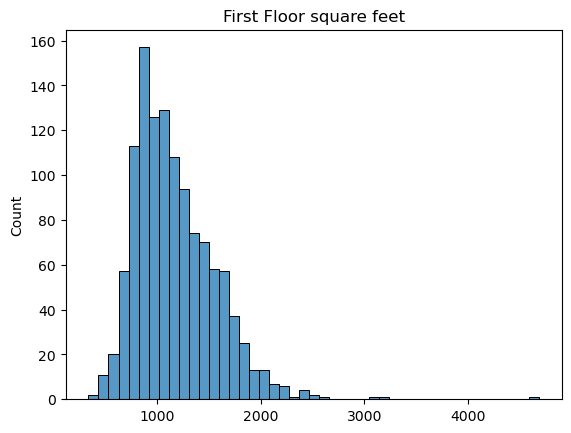

In [29]:
sns.histplot(data=stFLsf).set(title='First Floor square feet')

[Text(0.5, 1.0, 'Total rooms above grade')]

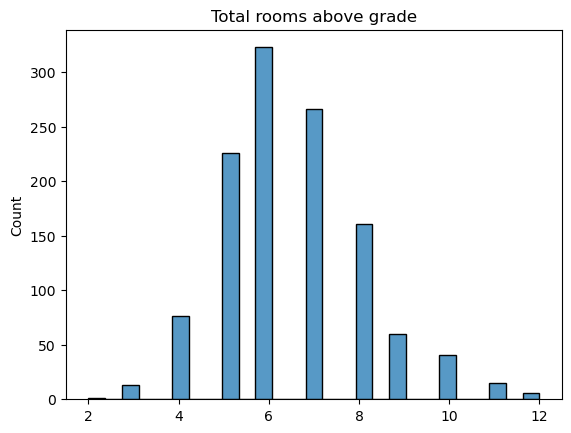

In [30]:
sns.histplot(data=TotalRmsAbvGrd).set(title='Total rooms above grade')

[Text(0.5, 1.0, 'Original construction date')]

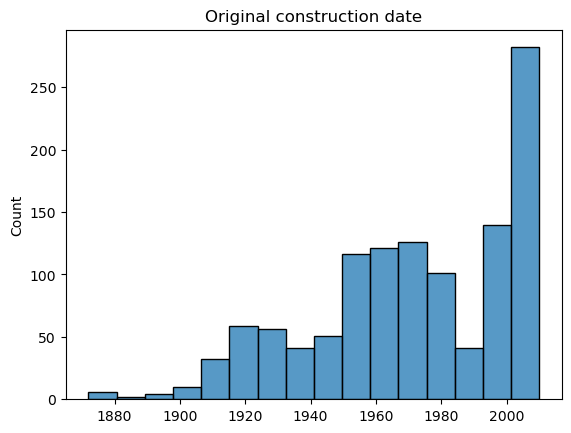

In [31]:
sns.histplot(data=YearBuilt).set(title='Original construction date')

[Text(0.5, 1.0, 'Linear feet of street connected to property')]

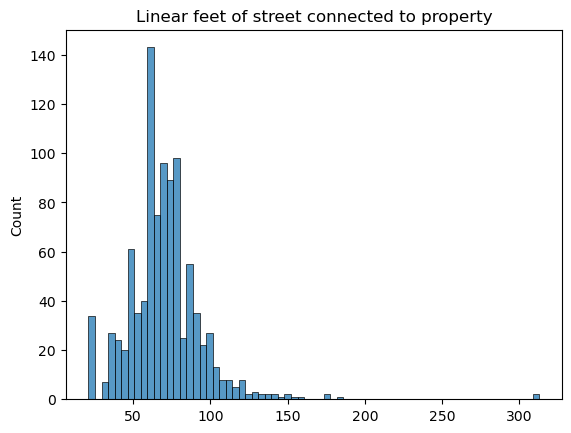

In [32]:
sns.histplot(data=newLotFrontage).set(title='Linear feet of street connected to property')

5. Para cada variable independiente x :
- Calcular el coeficiente de correlación entre x y y.
- Graficar x vs y(scatterplot) usando matplotlib.
- Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.
- Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables
    con más potencial predictivo es decir las 2 variables que presentan mayor correlación
    entre dicha variable y la variable dependiente

### Calculamos coeficiente de correlacion

In [33]:
#Convierto a un dataframe de pandas dado que en numpy no da un unico coeficiente de correlacion 
df = pd.DataFrame(data_training,columns=['Sale Price','OverallQual','1stFlrSF','TotalRmsAbvGrd','YearBuilt','LotFrontage'])
print(df)

      Sale Price  OverallQual  1stFlrSF  TotalRmsAbvGrd  YearBuilt  \
0       208500.0          7.0     856.0             8.0     2003.0   
1       223500.0          7.0     920.0             6.0     2001.0   
2       140000.0          7.0     961.0             7.0     1915.0   
3       250000.0          8.0    1145.0             9.0     2000.0   
4       143000.0          5.0     796.0             5.0     1993.0   
...          ...          ...       ...             ...        ...   
1183    175000.0          6.0     953.0             7.0     1999.0   
1184    210000.0          6.0    2073.0             7.0     1978.0   
1185    266500.0          7.0    1188.0             9.0     1941.0   
1186    142125.0          5.0    1078.0             5.0     1950.0   
1187    147500.0          5.0    1256.0             6.0     1965.0   

      LotFrontage  
0            65.0  
1            68.0  
2            60.0  
3            84.0  
4            85.0  
...           ...  
1183         62.0  

In [34]:
corr1 = df['Sale Price'].corr(df['OverallQual'])    # Coeficiente de Correlacion SalePrice vs OverallQual
corr2 = df['Sale Price'].corr(df['1stFlrSF'])       # Coeficiente de Correlacion SalePrice vs 1stFlrSF
corr3 = df['Sale Price'].corr(df['YearBuilt'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
corr4 = df['Sale Price'].corr(df['LotFrontage'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
corr5 = df['Sale Price'].corr(df['TotalRmsAbvGrd'])       # Coeficiente de Correlacion SalePrice vs YearBuilt
print(f"El coeficiente de correlacion entre Sale Price y OverallQual es de: {corr1}")
print(f"El coeficiente de correlacion entre Sale Price y First Floor square feet es de: {corr2}")
print(f"El coeficiente de correlacion entre Sale Price y Year Built es de: {corr3}")
print(f"El coeficiente de correlacion entre Sale Price y Linear Feet of street connected to property es de: {corr4}")
print(f"El coeficiente de correlacion entre Sale Price y Total rooms above grade es de: {corr5}")


El coeficiente de correlacion entre Sale Price y OverallQual es de: 0.7971067690876772
El coeficiente de correlacion entre Sale Price y First Floor square feet es de: 0.6016273849597186
El coeficiente de correlacion entre Sale Price y Year Built es de: 0.5220189187260862
El coeficiente de correlacion entre Sale Price y Linear Feet of street connected to property es de: 0.3510312672711136
El coeficiente de correlacion entre Sale Price y Total rooms above grade es de: 0.5287118345637839


### Graficar x vs y(scatterplot) usando matplotlib.

<function matplotlib.pyplot.show(close=None, block=None)>

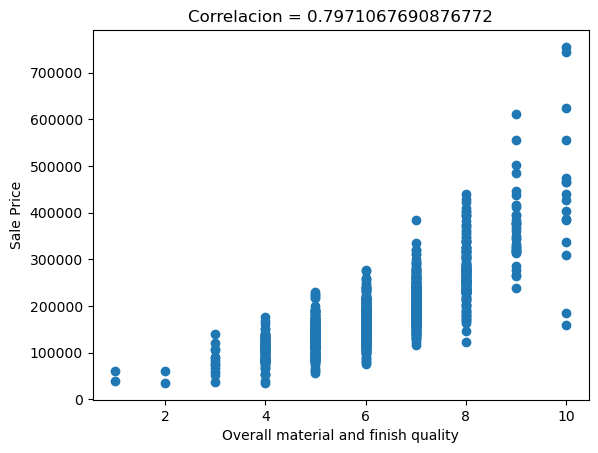

In [35]:
plt.scatter(OverallQual,sale_price)
plt.title(f"Correlacion = {corr1}")
plt.xlabel("Overall material and finish quality")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

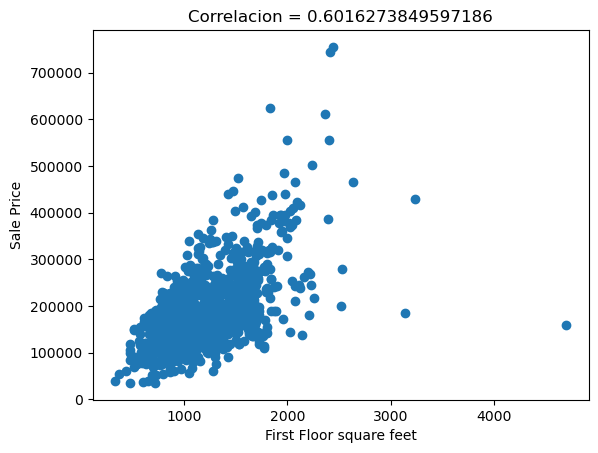

In [36]:
plt.scatter(stFLsf,sale_price)
plt.title(f"Correlacion = {corr2}")
plt.xlabel("First Floor square feet")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

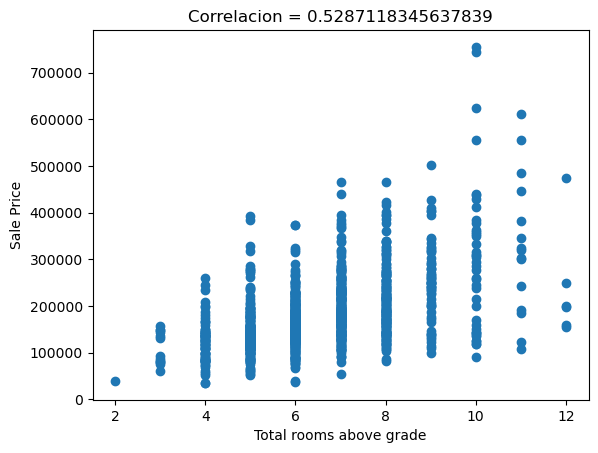

In [37]:
plt.scatter(TotalRmsAbvGrd,sale_price)
plt.title(f"Correlacion = {corr5}")
plt.xlabel("Total rooms above grade")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

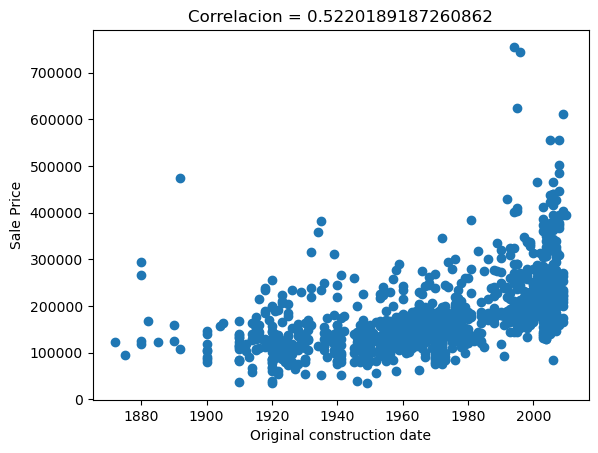

In [38]:
plt.scatter(YearBuilt,sale_price)
plt.title(f"Correlacion = {corr3}")
plt.xlabel("Original construction date")
plt.ylabel("Sale Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

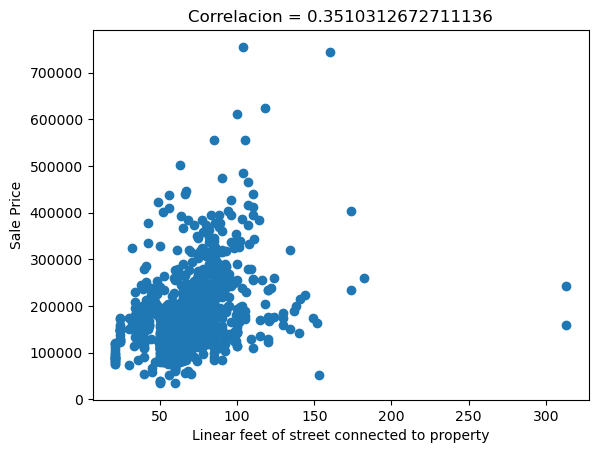

In [39]:
plt.scatter(LotFrontage,sale_price)
plt.title(f"Correlacion = {corr4}")
plt.xlabel("Linear feet of street connected to property")
plt.ylabel("Sale Price")
plt.show

#### Dado las graficas anteriores junto con el coeficiente de correlacion las dos variables con mas potencial predictivo para la variable Sale Price son OverallQual(Overall material and finish quality) y First Floor square feet por lo que los modelos se implementaran en base a estas dos variables 

## Se empieza a trabajar con programacion orientada a objetos

In [63]:
class Modelo:
    def __init__(self,varx,vary,epochs,print_error_every, learning_rate):
        self.varx = varx
        self.vary = vary
        self.epochs = epochs
        self.print_error_every = print_error_every
        self.learning_rate = learning_rate
        b1 = 2
        b0 = 3
        betas = np.array([b0,b1])
        vect1 = np.ones_like(varx).reshape(-1,1)
        varx = np.reshape(varx,(-1,1))
        self.A = np.hstack([varx,vect1])
    def __repr__(self):
        return f"{self.A}"




In [62]:
modelo1 = Modelo(OverallQual,sale_price,1,1,1)
print (modelo1.__repr2__)

<bound method Modelo.__repr2__ of [[7. 1.]
 [7. 1.]
 [7. 1.]
 ...
 [7. 1.]
 [5. 1.]
 [5. 1.]]>
